In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cmath
import math
import scipy.integrate

In [2]:
#Defining Function to plot the continuous time plot

def plot_signal(x,y,text,xlow=-10,xup=30):
    plt.plot(x,y)
    plt.grid()
    plt.xlim(xlow,xup)
    plt.xlabel('Time(t)')
    plt.ylabel('x(t)')
    plt.title(text)

## 1. Continuous Signals
 * Basic Signals
 $$ y(t) = ax(bt+c) $$

#### Unit Step Signal
 $$ x_{1}(t) = u(t) =\begin{cases} 
    0 & \text{$t$ <0}\\ 
    1 & \text{0 $\leq$ $t$ $\leq20$ }\\ 
    \end{cases} $$
  
#### Unit Step Signal with amplitude scaling a=4 and time shift c=-2
 $$ x_{1}(t) = 4u(t-2) $$

#### Unit Step Signal with time scaling b=0.5 and time shift c=-1
 $$ x_{1}(t) = u(0.5t-1) $$

In [3]:
t = np.linspace(-20,20,4001)

In [4]:
x1 = list()
for i in t:
    if i<0:
        x1.append(0)
    else:
        x1.append(1)
x1 = np.array(x1)

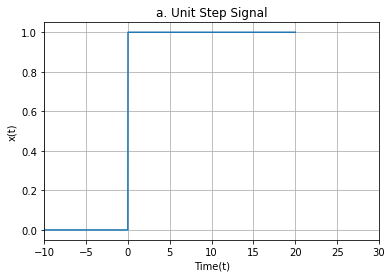

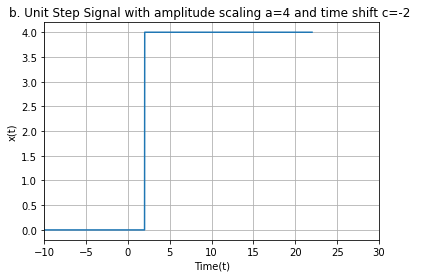

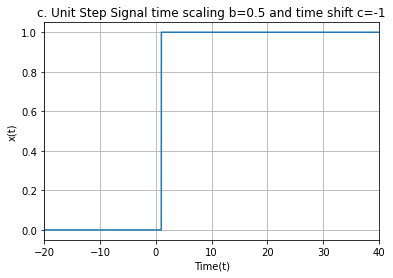

In [5]:
plot_signal(t,x1,'a. Unit Step Signal')
plt.show()
plot_signal(t+2,4*x1,'b. Unit Step Signal with amplitude scaling a=4 and time shift c=-2 ')
plt.show()
plot_signal(2*t+1,x1,'c. Unit Step Signal time scaling b=0.5 and time shift c=-1',-20,40)
plt.show()

### Unit Ramp Signal
$$ x_{2}(t) = r(t) = tu(t) $$

#### Unit Ramp Signal with amplitude scaling a=4 and time shift c=-2
 $$ x_{2}(t) = 4r(t-2) $$

#### Unit Ramp Signal with time scaling b=0.5 and time shift c=-1
 $$ x_{2}(t) = r(0.5t-1) $$

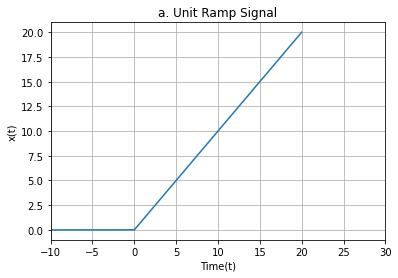

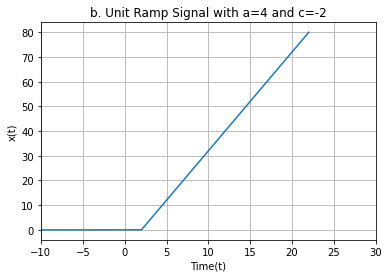

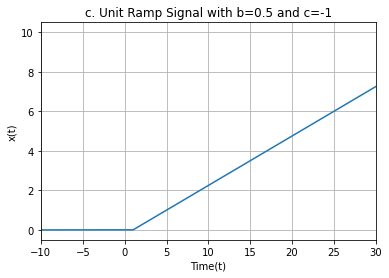

In [6]:
plot_signal(t,t*x1,'a. Unit Ramp Signal')
plt.show()
plot_signal(t+2,4*t*x1,'b. Unit Ramp Signal with a=4 and c=-2')
plt.show()
plot_signal(2*t+1,0.5*t*x1,'c. Unit Ramp Signal with b=0.5 and c=-1')
plt.show()

#### Unit Parabolic Signal
$$ x_{3}(t) = p(t) = t^{2}u(t)/2 $$

#### Unit Parabola Signal with amplitude scaling a=4 and time shift c=-2
 $$ x_{3}(t) = 4p(t-2) $$

#### Unit Parabola Signal with time scaling b=0.5 and time shift c=-1
 $$ x_{3}(t) = p(0.5t-1) $$

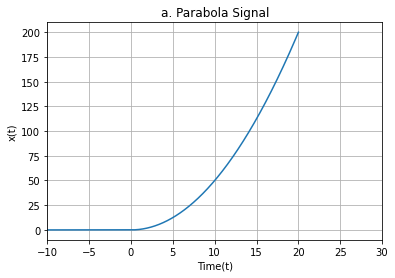

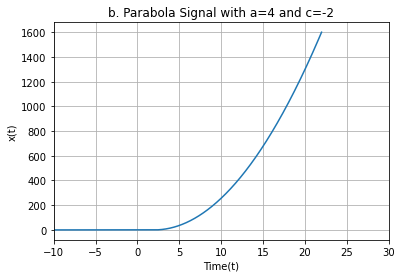

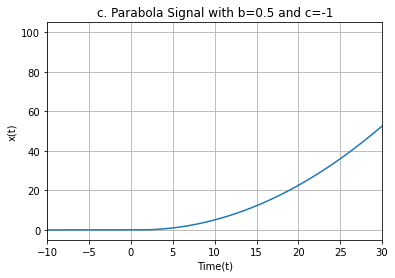

In [7]:
plot_signal(t,t*t*x1/2,'a. Parabola Signal')
plt.show()
plot_signal(t+2,4*t*t*x1,'b. Parabola Signal with a=4 and c=-2')
plt.show()
plot_signal(2*t+1,0.25*t*t*x1,'c. Parabola Signal with b=0.5 and c=-1')
plt.show()

### Rectangular Signal
$$ x_{4}(t) = rect(t/tau)  $$

#### Rectangular Signal with amplitude scaling a=4 and time shift c=-4
* $$ x_{4}(t) = 4rect(t/tau-2) $$

In [8]:
rect_tau = 4
def rect_pulse(t,rect_tau):
    return 1*(abs(t)<=rect_tau)

In [9]:
x4 = rect_pulse(t,rect_tau)

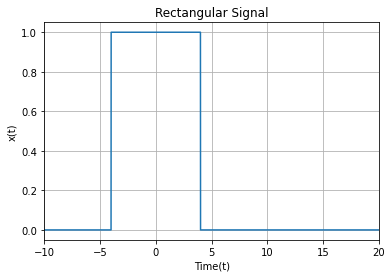

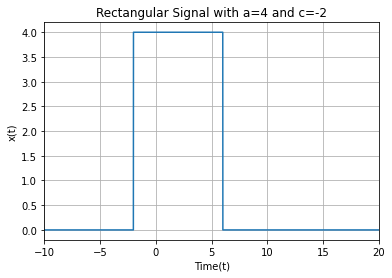

In [10]:
plot_signal(t,x4,'Rectangular Signal',-10,20)
plt.show()
plot_signal(t+2,4*x4,'Rectangular Signal with a=4 and c=-2',-10,20)
plt.show()

### Triangular Signal
$$ x_{5}(t) = rect(t/tau)*rect(t/tau)  $$

#### Triangular Signal with amplitude scaling a=4 and time shift c=-4
* $$ x_{5}(t) = 16rect(t/tau-2)*rect(t/tau-2) $$

In [11]:
x5 = np.convolve(rect_pulse(t,rect_tau),rect_pulse(t,rect_tau),'same')

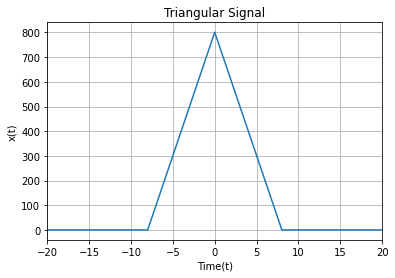

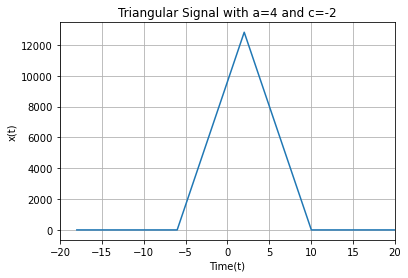

In [12]:
plot_signal(t,x5,'Triangular Signal',-20,20)
plt.show()
plot_signal(t+2,16*x5,'Triangular Signal with a=4 and c=-2',-20,20)
plt.show()

### Sinc Function
$$ x_{6}(t) = sin(\pi t)/\pi t  $$

In [13]:
x6 = np.sinc(t)

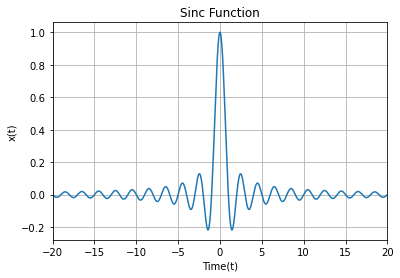

In [14]:
plot_signal(t,x6,'Sinc Function',-20,20)

#### Triangular Signal
* $$ x_{7}(t) =\begin{cases} 
    0 & \text{$t$ <0}\\ 
    (t-3)/7 & \text{3 $\leq$ $t$ $\leq10$ }\\
    (15-t)/5 & \text{10 $\leq$ $t$ $\leq15$ }\\
    0 & \text{$t$ >15}\\ 
    \end{cases} $$

In [15]:
d1 = 3
d2 = 10
d3 = 15

def triangle_signal(t,d1,d2,d3):
    x7 = []
    for i in t:
        if i<0:
            x7.append(0)
        elif i>=d1 and i<=d2:
            x7.append((i-d1)/(d2-d1))
        elif i>=d2 and i<=d3:
            x7.append((d3-i)/(d3-d2))
        else:
            x7.append(0)
    return x7
        

In [16]:
x7 = triangle_signal(t,d1,d2,d3)

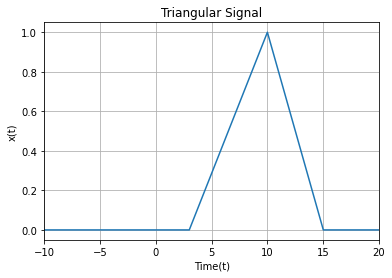

In [17]:
plot_signal(t,x7,'Triangular Signal',-10,20)
plt.show()

###  Exponential Signals
#### Consider a signal of the form: 
##### $$ x(t) = Ae^{−Bt}$$
#### Plot x(t) for different values of A and B. Choose A = 10 and −10; B ∈ {−5, −2.5, −0.5, 0, 1, 3}. Plot for all combinations of A and B and understand the behaviour of exponential signals.


In [18]:
exp_t = np.arange(-1,1,0.01)

exp_A = 10
exp_B = [-5,-2.5,-0.5,0,1,3]

exp_x1 = exp_A*np.exp(-exp_B[0]*exp_t)
exp_x2 = exp_A*np.exp(-exp_B[1]*exp_t)
exp_x3 = exp_A*np.exp(-exp_B[2]*exp_t)
exp_x4 = exp_A*np.exp(-exp_B[3]*exp_t)
exp_x5 = exp_A*np.exp(-exp_B[4]*exp_t)
exp_x6 = exp_A*np.exp(-exp_B[5]*exp_t)

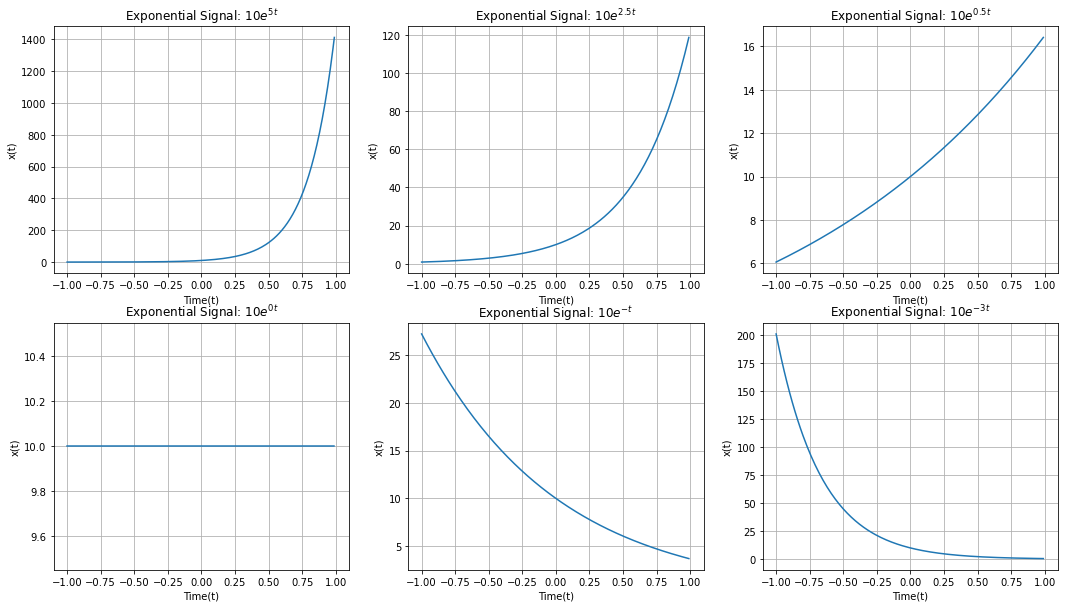

In [19]:
plt.figure(figsize=(18,10))
plt.subplot(231)
plot_signal(exp_t,exp_x1,'Exponential Signal: $10e^{5t}$',-1.1,1.1)
plt.subplot(232)
plot_signal(exp_t,exp_x2,'Exponential Signal: $10e^{2.5t}$',-1.1,1.1)
plt.subplot(233)
plot_signal(exp_t,exp_x3,'Exponential Signal: $10e^{0.5t}$',-1.1,1.1)
plt.subplot(234)
plot_signal(exp_t,exp_x4,'Exponential Signal: $10e^{0t}$',-1.1,1.1)
plt.subplot(235)
plot_signal(exp_t,exp_x5,'Exponential Signal: $10e^{-t}$',-1.1,1.1)
plt.subplot(236)
plot_signal(exp_t,exp_x6,'Exponential Signal: $10e^{-3t}$',-1.1,1.1)
plt.show()

###  Complex Exponential Signals

###  Complex exponential Signals
#### Consider a signal of the form: 
##### $$ y(t) = ae^{−bt}cos(wt+phi)$$
#### Plot the signal for a = (0.5,-2) , b= (-0.25,1), w = (pi,pi/4,4pi/3) and phi is uniformly distributed between -pi and pi

In [20]:
comp_t = np.arange(-10,10,0.01)

In [21]:
comp_alpha = [0.5,-2]
comp_beta = [-0.25,1]
comp_omega = np.around([cmath.pi,cmath.pi/4,4*cmath.pi/3],3)
comp_phi = np.around([cmath.pi/2, cmath.pi/3],3)    # Taking two values of phi

In [22]:
# Taking all possible combinations of a,b,w and phi

comp_params = np.array(np.meshgrid(comp_alpha,comp_beta,comp_omega,comp_phi)).T.reshape(-1,4)
comp_params

array([[ 0.5  , -0.25 ,  3.142,  1.571],
       [ 0.5  ,  1.   ,  3.142,  1.571],
       [-2.   , -0.25 ,  3.142,  1.571],
       [-2.   ,  1.   ,  3.142,  1.571],
       [ 0.5  , -0.25 ,  0.785,  1.571],
       [ 0.5  ,  1.   ,  0.785,  1.571],
       [-2.   , -0.25 ,  0.785,  1.571],
       [-2.   ,  1.   ,  0.785,  1.571],
       [ 0.5  , -0.25 ,  4.189,  1.571],
       [ 0.5  ,  1.   ,  4.189,  1.571],
       [-2.   , -0.25 ,  4.189,  1.571],
       [-2.   ,  1.   ,  4.189,  1.571],
       [ 0.5  , -0.25 ,  3.142,  1.047],
       [ 0.5  ,  1.   ,  3.142,  1.047],
       [-2.   , -0.25 ,  3.142,  1.047],
       [-2.   ,  1.   ,  3.142,  1.047],
       [ 0.5  , -0.25 ,  0.785,  1.047],
       [ 0.5  ,  1.   ,  0.785,  1.047],
       [-2.   , -0.25 ,  0.785,  1.047],
       [-2.   ,  1.   ,  0.785,  1.047],
       [ 0.5  , -0.25 ,  4.189,  1.047],
       [ 0.5  ,  1.   ,  4.189,  1.047],
       [-2.   , -0.25 ,  4.189,  1.047],
       [-2.   ,  1.   ,  4.189,  1.047]])

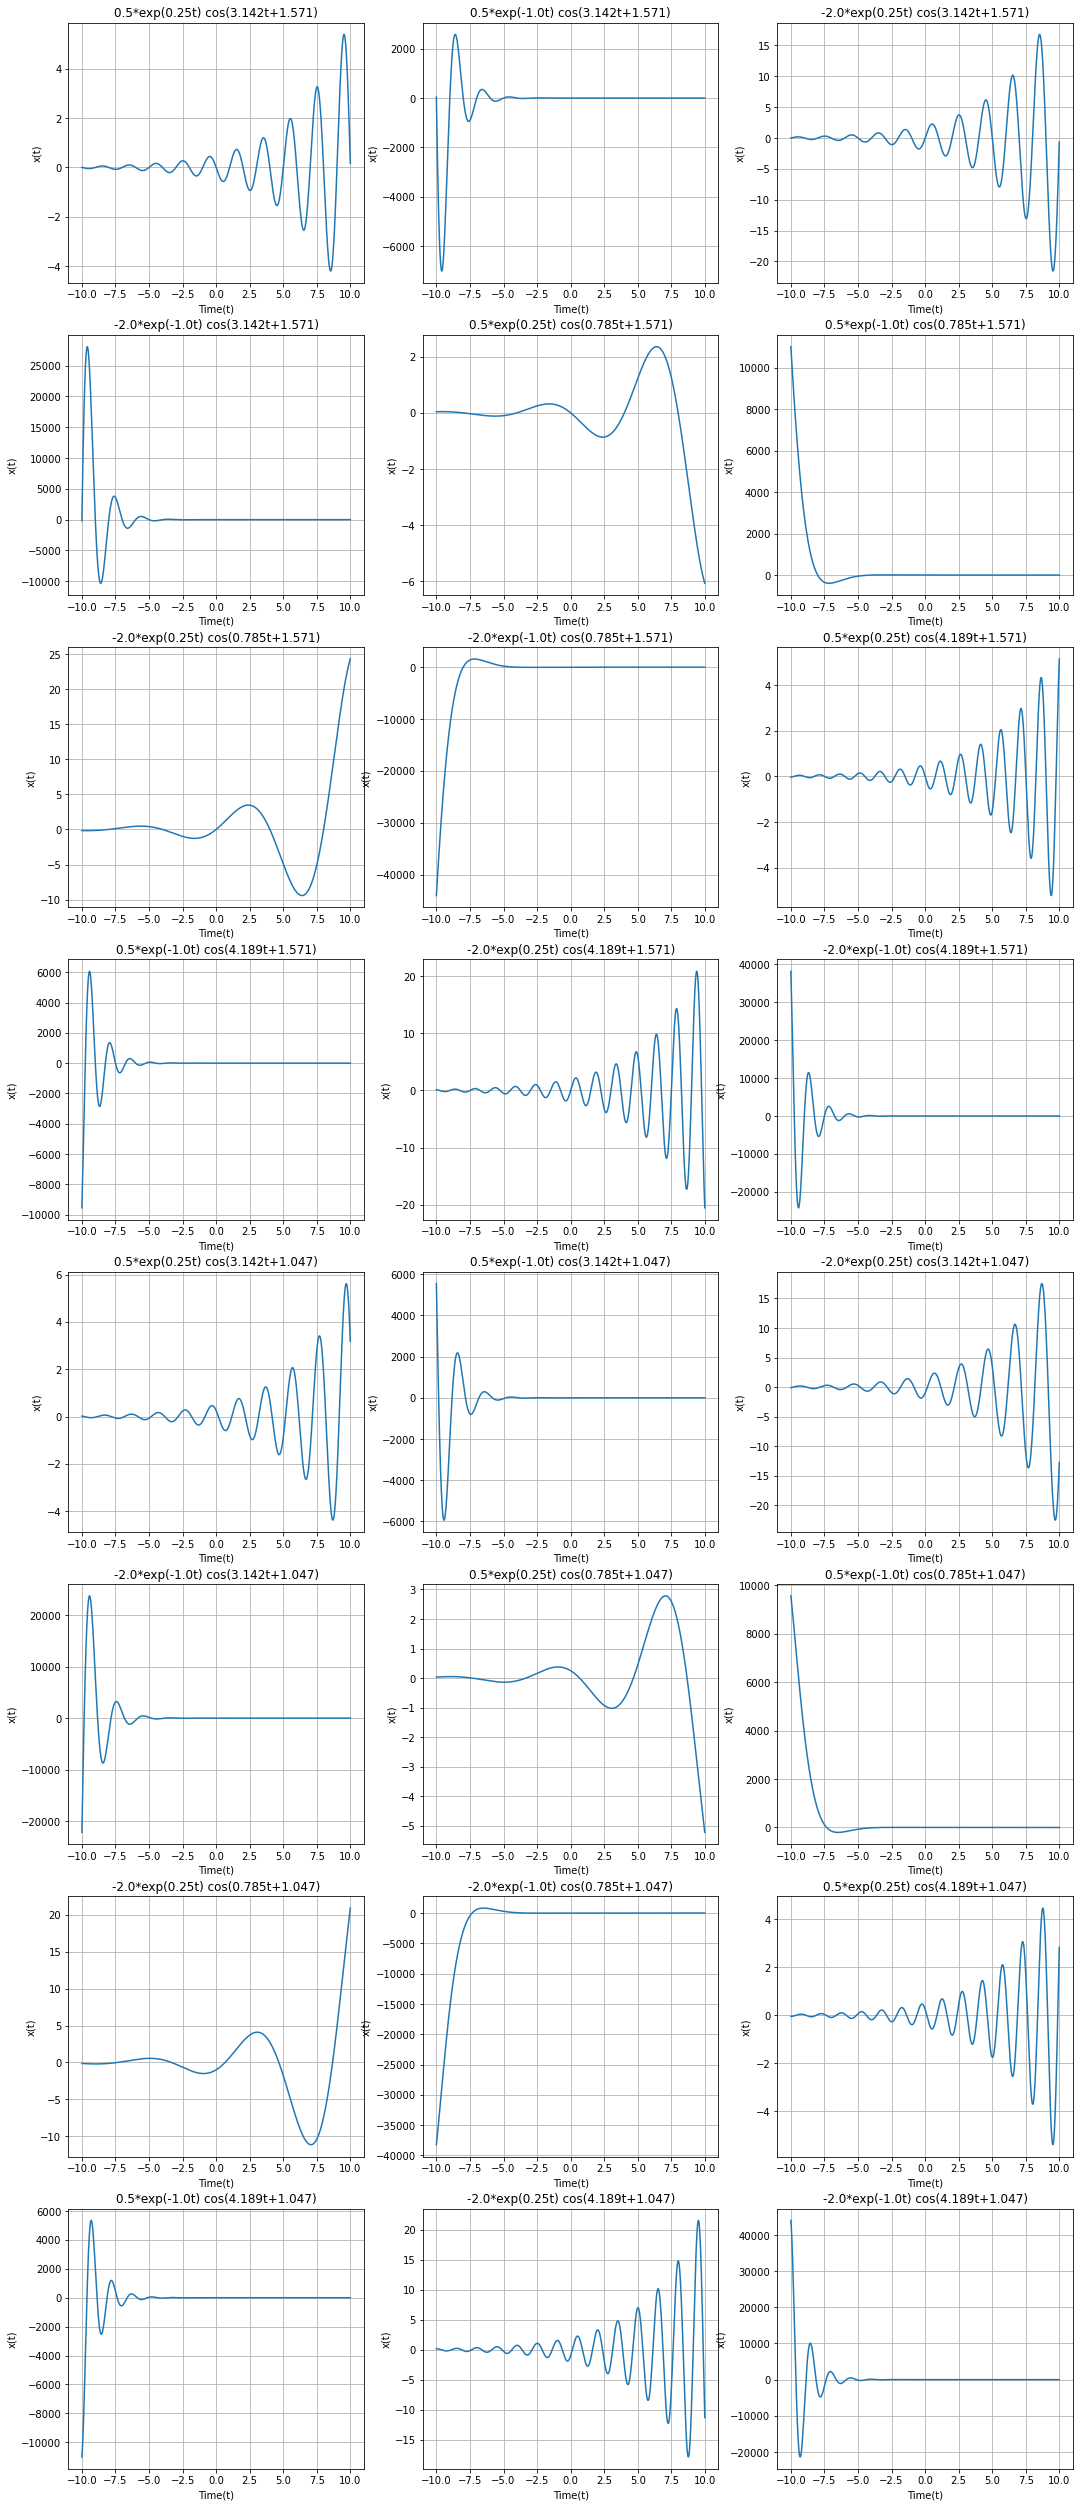

In [23]:
plt.figure(figsize=(18,45))
for i in range(len(comp_params)):
    comp_y = comp_params[i][0]*np.exp(-1*comp_params[i][1]*comp_t)*np.cos(comp_params[i][2]*comp_t+comp_params[i][3])
    plt.subplot(8,3,i+1)
    title=f'{comp_params[i][0]}*exp({-comp_params[i][1]}t) cos({comp_params[i][2]}t+{comp_params[i][3]})'
    plot_signal(comp_t,comp_y,title,-11,11)

plt.show()

#### Consider a signal of the form: 
##### $$ y(t) = ae^{j(wt+phi)}$$
#### Plot Re(y(t)), Im(y(t)), |y(t)|, ∠y(t) when (α, ω, ϕ) = (1, 0.14π, −π/3), (2, 0.34π, −π/2), and (2, 0.75π, π).

In [24]:
comp_exp_t = np.arange(-10,10,0.01)

In [25]:
comp_exp_params = np.around([[1,0.14*cmath.pi,-1*cmath.pi/3],[2,0.34*cmath.pi,-1*cmath.pi/2],[2,0.75*cmath.pi,cmath.pi]],3)

In [26]:
comp_exp_params

array([[ 1.   ,  0.44 , -1.047],
       [ 2.   ,  1.068, -1.571],
       [ 2.   ,  2.356,  3.142]])

alpha=1.0, omega=0.44,and phi=-1.047


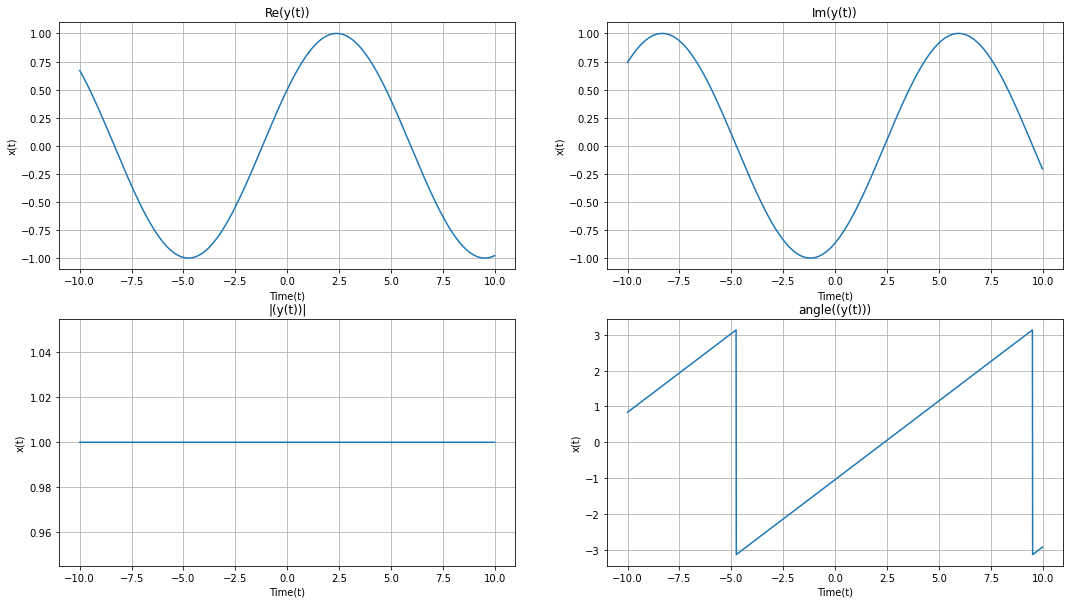

alpha=2.0, omega=1.068,and phi=-1.571


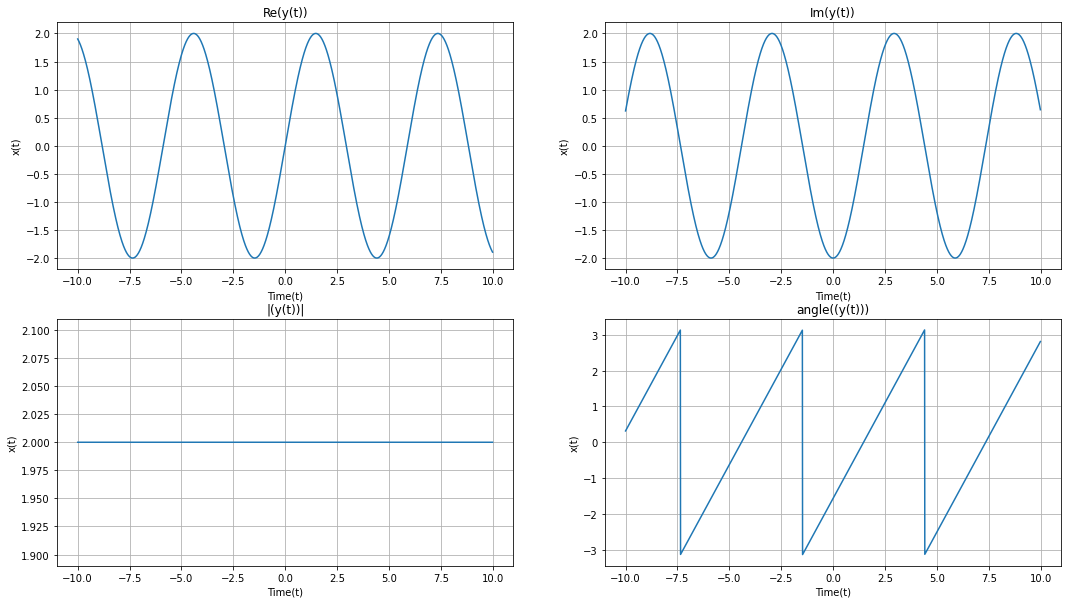

alpha=2.0, omega=2.356,and phi=3.142


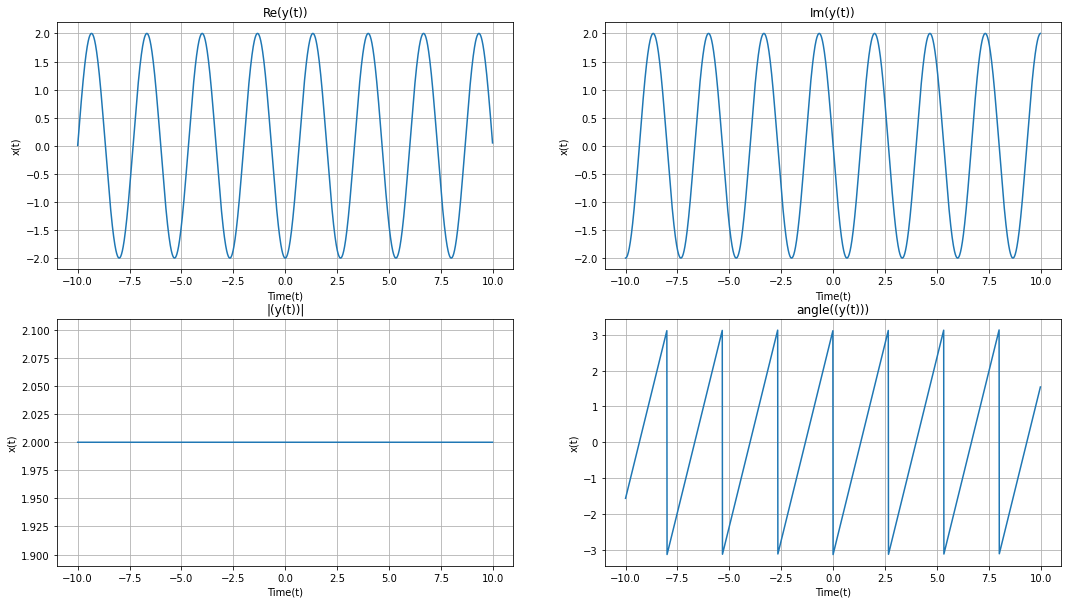

In [27]:
for k in range(len(comp_exp_params)):
    comp_exp_temp = comp_exp_params[k][1]*comp_exp_t+comp_exp_params[k][2]
    comp_exp_temp_1 = [cmath.exp((i)*(1j)) for i in comp_exp_temp]
    comp_exp_y = np.multiply(comp_exp_params[k][0],comp_exp_temp_1)
    
    print(f'alpha={comp_exp_params[k][0]}, omega={comp_exp_params[k][1]},and phi={comp_exp_params[k][2]}')
    
    plt.figure(figsize=(18,10))
    plt.subplot(221)
    plot_signal(comp_exp_t,comp_exp_y.real,'Re(y(t))',-11,11)
    plt.subplot(222)
    plot_signal(comp_exp_t,comp_exp_y.imag,'Im(y(t))',-11,11)
    plt.subplot(223)
    plot_signal(comp_exp_t,abs(comp_exp_y),'|(y(t))|',-11,11)
    
    comp_exp_y_phase = [cmath.phase(comp_exp_x) for comp_exp_x in comp_exp_y]
    plt.subplot(224)
    plot_signal(comp_exp_t,comp_exp_y_phase,'angle((y(t)))',-11,11)
    
    plt.show()

###  Sinusoidal Signals
$$x_{1}(t) = sin(πt)$$
$$x_{2}(t) = 2sin(2πt)$$
$$x_{3}(t) = 4sin(2πt/3)$$
$$x_{4}(t) = 3cos(πt/4)$$
$$x_{5}(t) = 3cos(2πt+π/4)$$
$$x_{6}(t) = x_{1}(-t)+x_{2}(t)$$
$$x_{7}(t) = x_{4}(t)+x_{5}(t)$$
$$x_{8}(t) = x_{2}(-t)+x_{4}(t)$$
$$x_{9}(t) = x_{3}(-t)-x_{5}(-t)$$

In [28]:
sinu_t = np.arange(-5,5,0.01)

In [29]:
sinu_x1 = np.sin(math.pi*sinu_t)
sinu_x2 = 2*np.sin(2*math.pi*sinu_t)
sinu_x3 = 4*np.sin(2*math.pi*sinu_t/3)
sinu_x4 = 3*np.cos(math.pi*sinu_t/4)
sinu_x5 = 3*np.cos(2*math.pi*sinu_t+math.pi/4)
sinu_x6 = np.flip(sinu_x1)+sinu_x2
sinu_x7 = sinu_x4 + sinu_x5
sinu_x8 = np.flip(sinu_x2) + sinu_x4
sinu_x9 = np.flip(sinu_x3) - np.flip(sinu_x5)

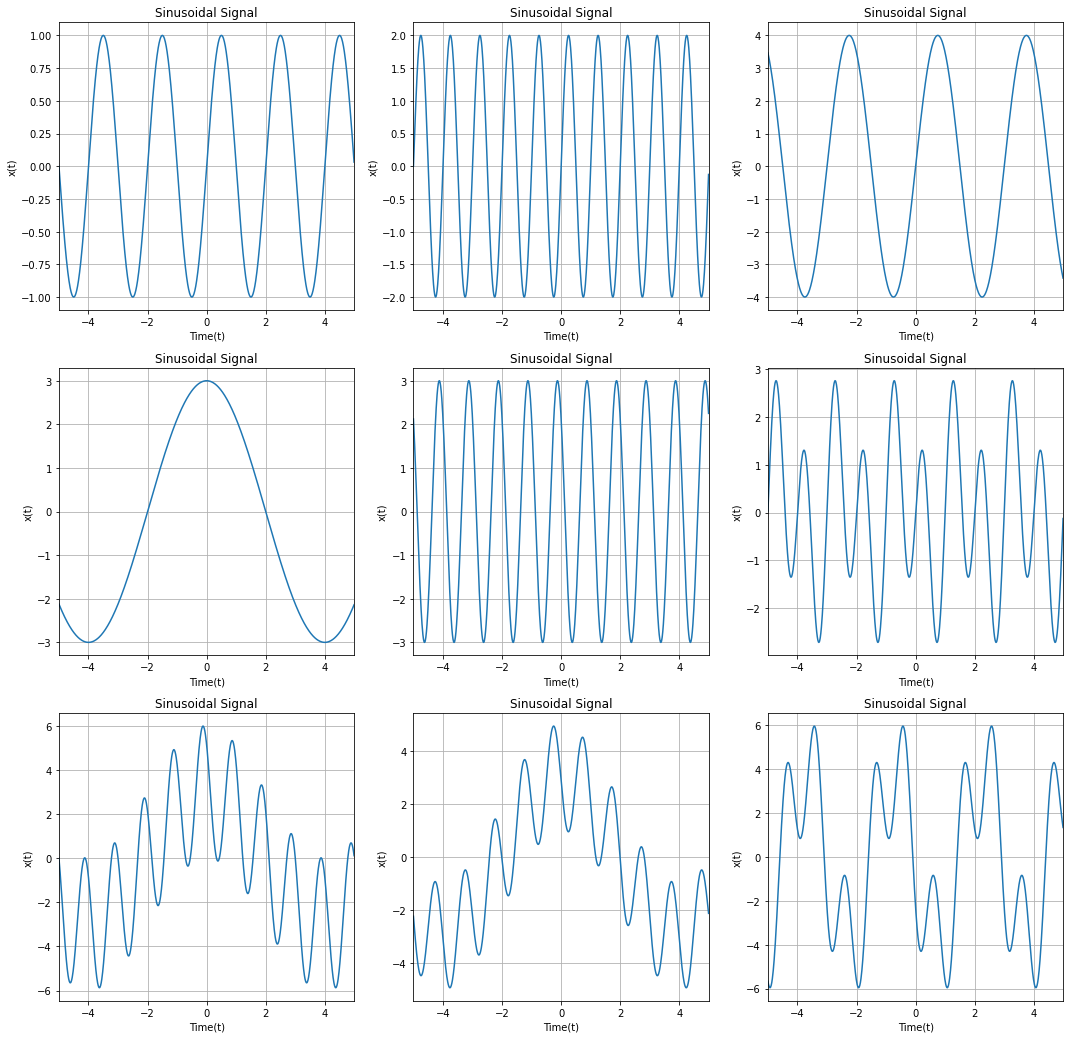

In [30]:
plt.figure(figsize=(18,18))
plt.subplot(331)
plot_signal(sinu_t,sinu_x1,'Sinusoidal Signal',-5,5)
plt.subplot(332)
plot_signal(sinu_t,sinu_x2,'Sinusoidal Signal',-5,5)
plt.subplot(333)
plot_signal(sinu_t,sinu_x3,'Sinusoidal Signal',-5,5)
plt.subplot(334)
plot_signal(sinu_t,sinu_x4,'Sinusoidal Signal',-5,5)
plt.subplot(335)
plot_signal(sinu_t,sinu_x5,'Sinusoidal Signal',-5,5)
plt.subplot(336)
plot_signal(sinu_t,sinu_x6,'Sinusoidal Signal',-5,5)
plt.subplot(337)
plot_signal(sinu_t,sinu_x7,'Sinusoidal Signal',-5,5)
plt.subplot(338)
plot_signal(sinu_t,sinu_x8,'Sinusoidal Signal',-5,5)
plt.subplot(339)
plot_signal(sinu_t,sinu_x9,'Sinusoidal Signal',-5,5)
plt.show()

### Determine the power and energy of exponential, complex exponential, and sinusoidal signals

#### Energy of a signal x(t) is defined as $ E = (\int_{-\infty}^{\infty} |x(t)|^2 \,dx) $
#### Power of a signal x(t) is defined as $ P = \lim_{T\to\infty} \frac{1}{T}(\int_{-\frac{-T}{2}}^{\frac{T}{2}} |x(t)|^2 \,dx)) $

### Exponential Signals
$x(t) = ae^{bt}$

##### Power and energy of exponential signal is $\infty$

### Complex Exponential Signals
$ x(t) = \alpha e^{j(\omega t+\phi)} $

###### Energy of complex exponential signal is $\infty$
##### Power of complex exponential signal is $ \alpha^{2}$

### Sinusoidal Signals
$x(t) = Asin(\omega t+\phi)$

###### Energy of sinusoidal signal is $\infty$
##### Power of sinusoidal signal is $ \frac{A^{2}}{2}$

## Discrete Time Signals

###  Plot the following signals
$$ x_{1}[n] = \delta[n] $$
$$ x_{2}[n] = \delta[3n] $$
$$ x_{3}[n] = \delta[3n-2] $$
$$ x_{4}[n] = \delta[n^{2}+3n+2] $$
$$ x_{5}[n] = x_{1}[n] + x_{2}[n] + x_{3}[n] $$
$$ x_{6}[n] = \sum_{k=-100}^{100}\delta[n-k] $$

In [32]:
# Taking discrete time range to be -10 to 20
disc_n = np.arange(-10,20)
disc_n

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19])

In [33]:
# Function to define delta function
def disc_delta(n):
    imp = np.zeros(len(n))
    index = np.where(n==0)
    imp[index] = 1
    return imp

In [34]:
disc_x1 = disc_delta(disc_n)
disc_x2 = disc_delta(3*disc_n)
disc_x3 = disc_delta(3*disc_n-2)
disc_x4 = disc_delta(disc_n*disc_n+3*disc_n+2)
disc_x5 = disc_x1 + disc_x2 + disc_x3

disc_x6=np.zeros(201)
disc_n_x6 = np.arange(-100,101)
for k in range(-100,101):
    disc_x6 = disc_x6 + disc_delta(disc_n_x6+k)

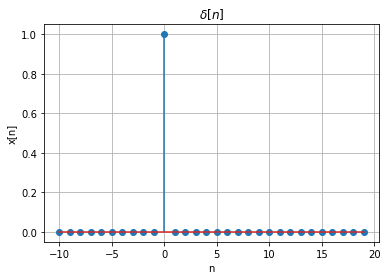

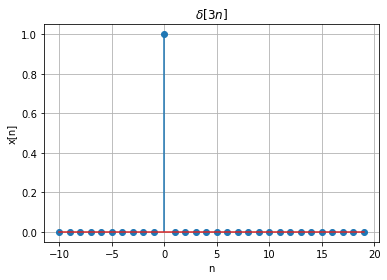

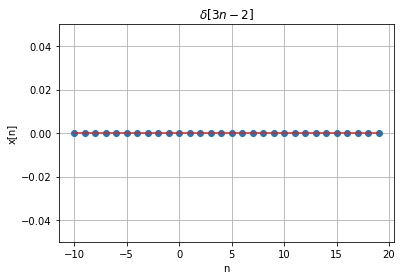

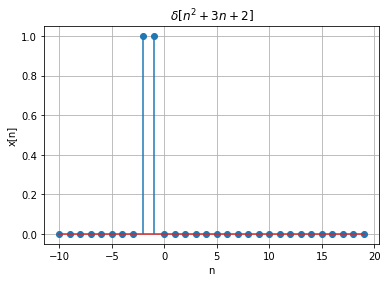

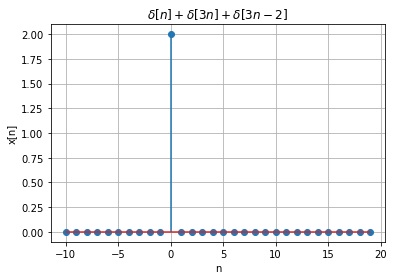

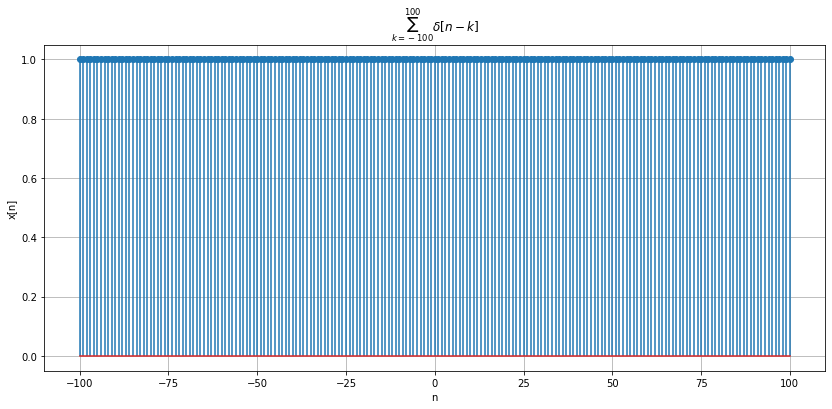

In [35]:
plt.stem(disc_n,disc_x1)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('$\delta[n]$')
plt.grid()
plt.show()
plt.stem(disc_n,disc_x2)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('$\delta[3n]$')
plt.grid()
plt.show()
plt.stem(disc_n,disc_x3)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('$\delta[3n-2]$')
plt.grid()
plt.ylim(-0.05,0.05)
plt.show()
plt.stem(disc_n,disc_x4)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('$\delta[n^{2}+3n+2]$')
plt.grid()
plt.show()
plt.stem(disc_n,disc_x5)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('$\delta[n]+\delta[3n]+\delta[3n-2]$')
plt.grid()
plt.show()
plt.figure(figsize=(14,6))
plt.stem(disc_n_x6,disc_x6)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('$\sum_{k=-100}^{100}\delta[n-k]$')
plt.grid()
plt.show()

###  Plot the discrete-time counter parts of all the signals given in the continuous-time signals section. Replace x(t) by x[n] to plot the discrete-time signals. A discrete-time signal is obtained by sampling a continuous-time signal. For this, you can use the discrete impulse train to sample continuous-time signals in intervals of Ts sec.

In [36]:
# Unit Step Signal
disc_basic_x1 = np.array(list(map(int,disc_n>=0)))

# Unit Ramp Signal
disc_basic_x2 = disc_n*disc_basic_x1

# Unit Parabolic Signal
disc_basic_x3 = np.power(disc_n,2)*disc_basic_x1/2

# Unit Rectanglular signal
# Here tau = 4

disc_basic_x4 = 1*(abs(disc_n)<=4)

# Triangular signal
disc_basic_x5 = np.convolve(disc_basic_x4,disc_basic_x4)

# Sinc Function
disc_basic_x6 = np.sinc(np.linspace(-4,4,41))

# Triangle Function
# Using the same function defined for continous time
disc_basic_x7 = triangle_signal(disc_n,d1,d2,d3)

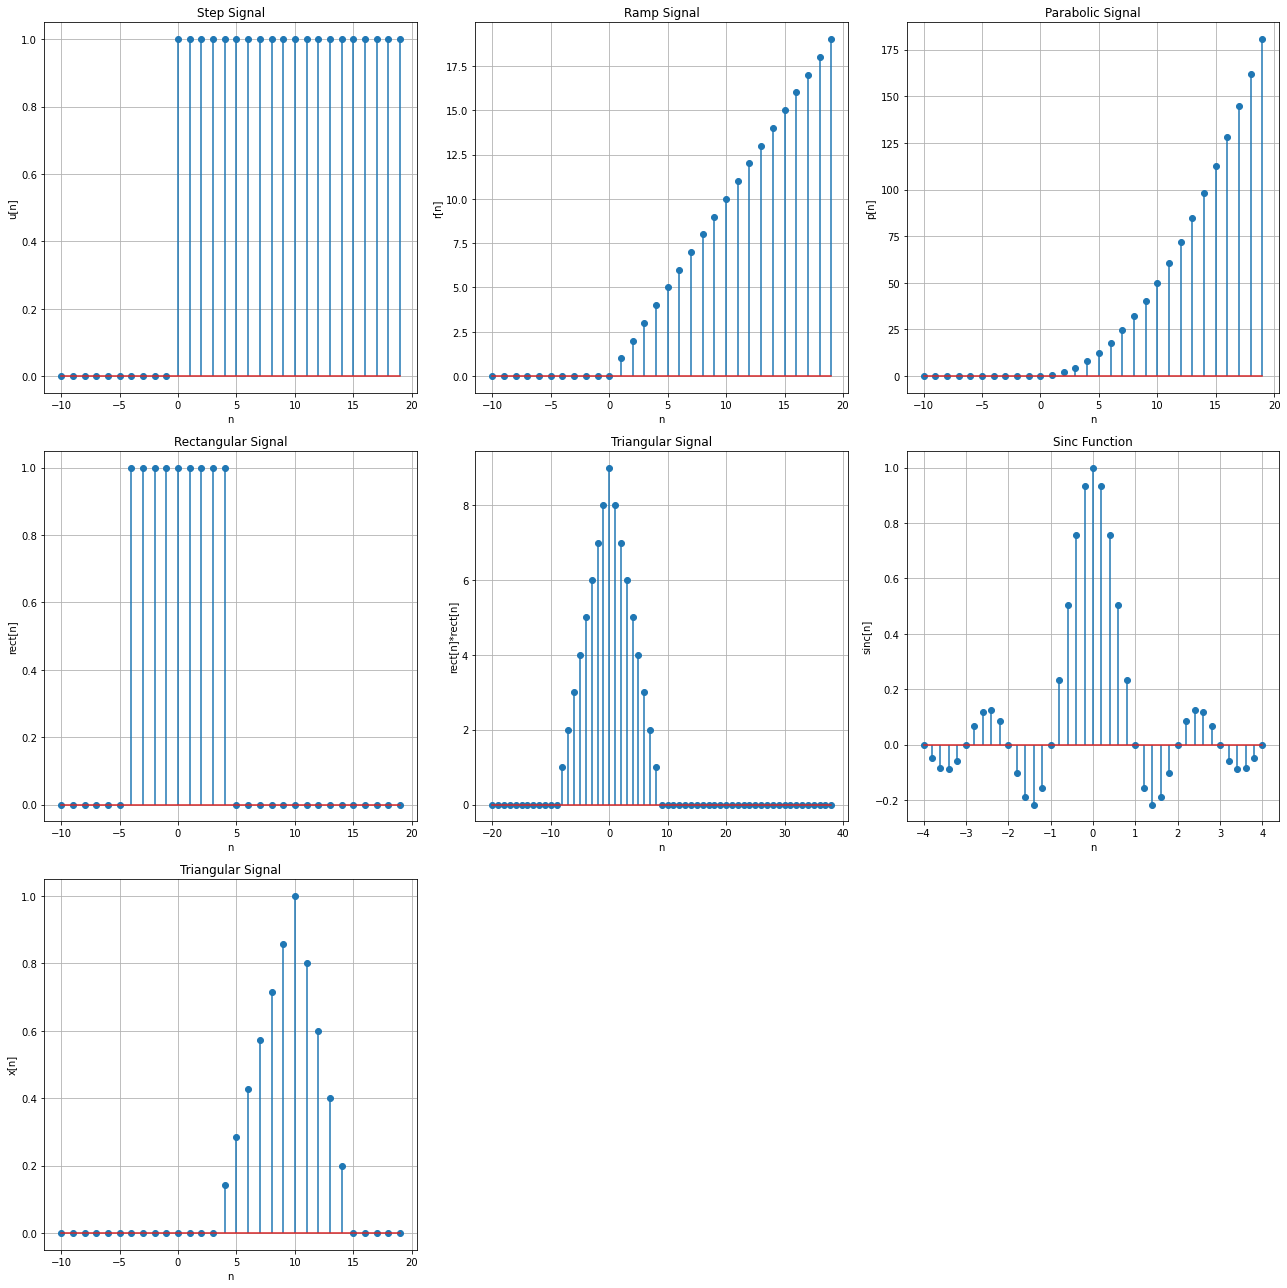

In [37]:
plt.figure(figsize=(18,18))

plt.subplot(331)
plt.grid()
plt.stem(disc_n,disc_basic_x1)
plt.xlabel('n')
plt.ylabel('u[n]')
plt.title('Step Signal')

plt.subplot(332)
plt.grid()
plt.stem(disc_n,disc_basic_x2)
plt.xlabel('n')
plt.ylabel('r[n]')
plt.title('Ramp Signal')

plt.subplot(333)
plt.grid()
plt.stem(disc_n,disc_basic_x3)
plt.xlabel('n')
plt.ylabel('p[n]')
plt.title('Parabolic Signal')

plt.subplot(334)
plt.grid()
plt.stem(disc_n,disc_basic_x4)
plt.xlabel('n')
plt.ylabel('rect[n]')
plt.title('Rectangular Signal')

plt.subplot(335)
plt.grid()
plt.stem(disc_n_x6[80:139],disc_basic_x5)
plt.xlabel('n')
plt.ylabel('rect[n]*rect[n]')
plt.title('Triangular Signal')

plt.subplot(336)
plt.grid()
plt.stem(np.linspace(-4,4,41),disc_basic_x6)
plt.xlabel('n')
plt.ylabel('sinc[n]')
plt.title('Sinc Function')

plt.subplot(337)
plt.grid()
plt.stem(disc_n,disc_basic_x7)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('Triangular Signal')

plt.tight_layout()
plt.show()

### In continuous-time domain, the impulse function, unit step function, ramp function, and parabolic function are related by the differentiation operation. That is if we differentiate ramp function we get unit step function and so on. Is there any such relation in the discrete-time domain? If yes, how will you implement ramp function from parabolic function, unit step function from ramp function, and impulse function from unit step function in the discrete-time domain

#### In discrete time domain, difference equation relates these function i.e. 
$$ \delta[n] = u[n-1]-u[n] $$
$$ u[n] = r[n-1]-r[n] $$
$$ r[n] = p[n-1]-p[n] $$

In [38]:
# From question 2 we have defined all basic signals

disc_ramp_x = disc_basic_x3[1:30] - disc_basic_x3[0:29]

disc_step_x = disc_basic_x2[1:30] - disc_basic_x2[0:29]

disc_imp_x = disc_basic_x1[1:30] - disc_basic_x1[0:29]

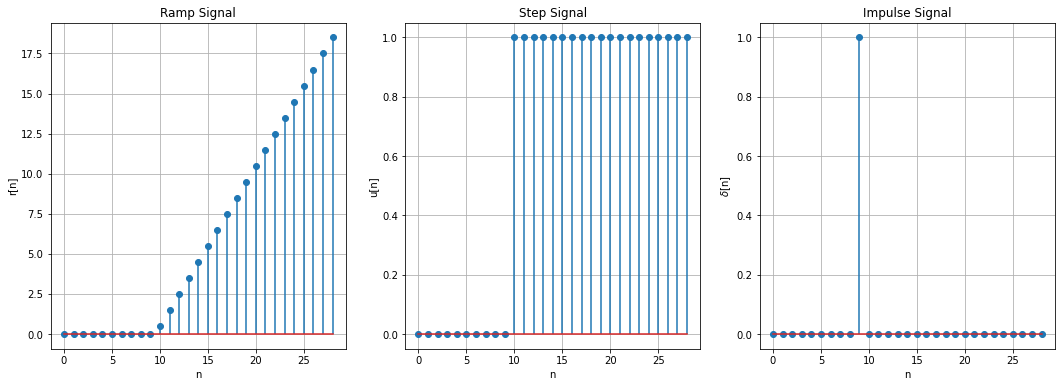

In [39]:
plt.figure(figsize=(18,6))

plt.subplot(131)
plt.grid()
plt.stem(disc_ramp_x)
plt.xlabel('n')
plt.ylabel('r[n]')
plt.title('Ramp Signal')

plt.subplot(132)
plt.grid()
plt.stem(disc_step_x)
plt.xlabel('n')
plt.ylabel('u[n]')
plt.title('Step Signal')

plt.subplot(133)
plt.grid()
plt.stem(disc_imp_x)
plt.xlabel('n')
plt.ylabel('$\delta$[n]')
plt.title('Impulse Signal')

plt.show()

#### • Plot an alternating discrete periodic triangle wave using impulse train.

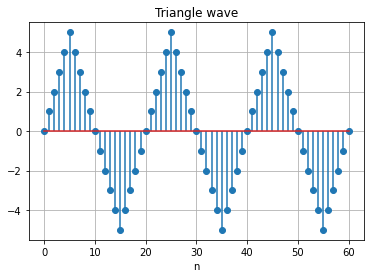

In [40]:
disc_tri_x = [0,1,2,3,4,5,4,3,2,1,0,-1,-2,-3,-4,-5,-4,-3,-2,-1]*3 + [0]
disc_n_2 = np.arange(len(disc_tri_x))


plt.stem(disc_n_2,disc_tri_x)
plt.grid()
plt.xlabel('n')
plt.title('Triangle wave')
plt.show()

## LTI Systems

### Let x[n] be the input to an linear-time invariant (LTI) system and h[n] be the impulse response. The output of a discrete LTI system in terms of the impulse response is characterized by the equation as:
$$ y[n] = x[n]*h[n] = \sum_{k=-\infty}^{\infty}\ x[k]h[n-k] $$

In [41]:
# Function to calculate convolution

def lti_conv(x,h):
    l1 = len(x)
    l2 = len(h)
    l3 = l1 + l2 - 1
    x_padded = np.zeros(l3)
    h_padded = np.zeros(l3)

    x_padded[:l1] = x
    h_padded[:l2] = h
    
    y = np.zeros(l3)
    
    for n in range(l3):
        for k in range(l3):
            y[n]=y[n]+x_padded[k]*h_padded[n-k]
    return y

In [42]:
lti_x1 = np.array([3,5,2,6,8])
lti_h1 = np.array([-2,4,1])

lti_x2 = np.array([2,3,4,7,1])
lti_h2 = np.array([1,4,-2])

In [43]:
lti_y1 = lti_conv(lti_x1,lti_h1)
lti_y2 = lti_conv(lti_x2,lti_h2)

print('The convolution result is: y1 =',lti_y1)
print('The convolution result is: y2 =',lti_y2)

The convolution result is: y1 = [-6.  2. 19.  1. 10. 38.  8.]
The convolution result is: y2 = [  2.  11.  12.  17.  21. -10.  -2.]


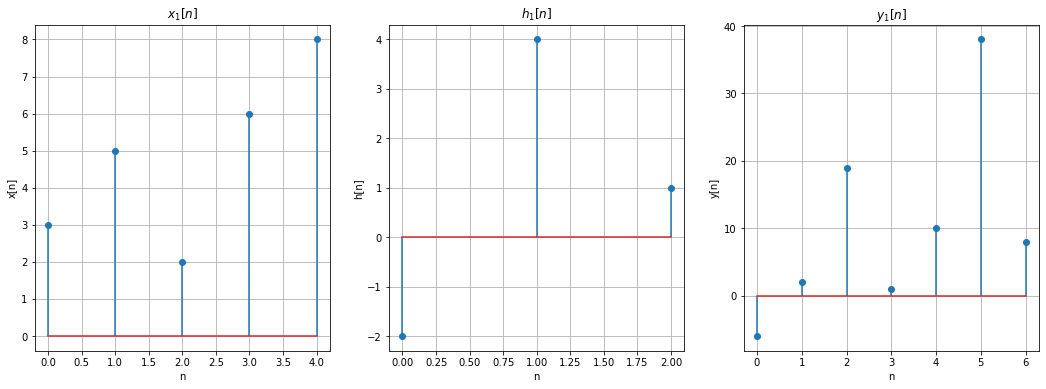

In [44]:
plt.figure(figsize=(18,6))
plt.subplot(131)
plt.stem(lti_x1)
plt.grid()
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('$x_{1}[n]$')
plt.subplot(132)
plt.stem(lti_h1)
plt.grid()
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('$h_{1}[n]$')
plt.subplot(133)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('$y_{1}[n]$')
plt.stem(lti_y1)
plt.grid()

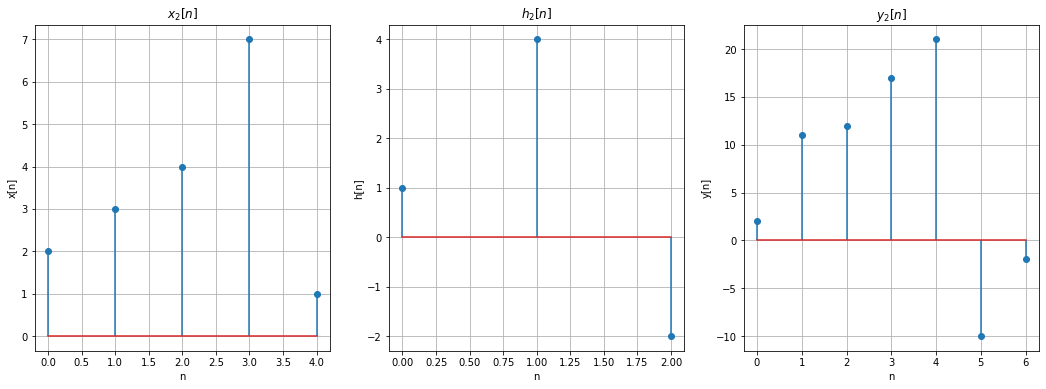

In [45]:
plt.figure(figsize=(18,6))
plt.subplot(131)
plt.stem(lti_x2)
plt.grid()
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('$x_{2}[n]$')
plt.subplot(132)
plt.stem(lti_h2)
plt.grid()
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('$h_{2}[n]$')
plt.subplot(133)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('$y_{2}[n]$')
plt.stem(lti_y2)
plt.grid()
plt.show()

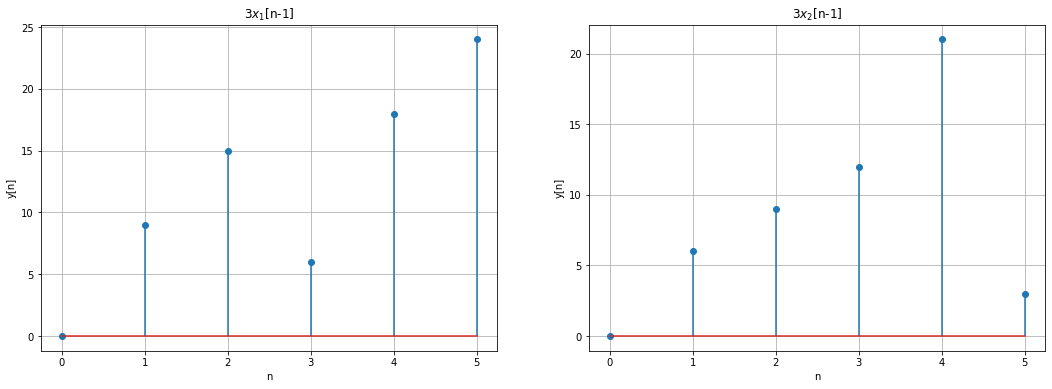

In [46]:
lti_y3 = np.zeros(len(lti_x1)+1)
lti_y3[1:] = 3*lti_x1

lti_y4 = np.zeros(len(lti_x1)+1)
lti_y4[1:] = 3*lti_x2

plt.figure(figsize=(18,6))
plt.subplot(121)
plt.stem(lti_y3)
plt.grid()
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('3$x_{1}$[n-1]')
plt.subplot(122)
plt.stem(lti_y4)
plt.grid()
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('3$x_{2}$[n-1]')
plt.show()

In [47]:
lti_imp = np.array([1])

# Finding impulse response of y[n]=3x[n-1]

lti_y5 = lti_conv(lti_y3,lti_imp)

lti_y6 = lti_conv(lti_y4,lti_imp)

In [48]:
# Output of the system to Unit step, unit ramp, unit parabolic and complex exponential inputs
# Unit step, ramp, parabolic are defined earlier i.e. disc_basic_x1, disc_basic_x2, disc_basic_x3
# Defining complex exponential input x[n] = e^((2+3j)n)

lti_exp = np.array([cmath.exp((2+3j)*n) for n in disc_n ])

In [49]:
lti_y7 = lti_conv(lti_y5,disc_basic_x1)
lti_y8 = lti_conv(lti_y5,disc_basic_x2)
lti_y9 = lti_conv(lti_y5,disc_basic_x3)
lti_y10 = np.convolve(lti_y5,lti_exp)

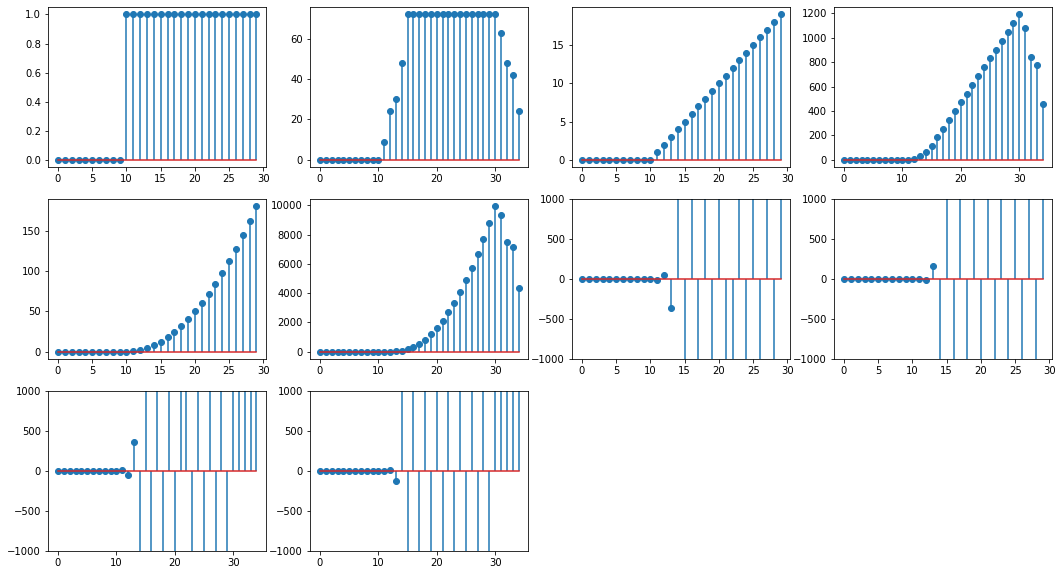

In [50]:
plt.figure(figsize=(18,10))
plt.subplot(341)
plt.stem(disc_basic_x1)
plt.subplot(342)
plt.stem(lti_y7)
plt.subplot(343)
plt.stem(disc_basic_x2)
plt.subplot(344)
plt.stem(lti_y8)
plt.subplot(345)
plt.stem(disc_basic_x3)
plt.subplot(346)
plt.stem(lti_y9)
plt.subplot(347)
plt.stem(lti_exp.real)
plt.ylim(-1000,1000)
plt.subplot(348)
plt.stem(lti_exp.imag)
plt.ylim(-1000,1000)
plt.subplot(349)
plt.stem(lti_y10.real)
plt.ylim(-1000,1000)
plt.subplot(3,4,10)
plt.stem(lti_y10.imag)
plt.ylim(-1000,1000)
plt.show()

#### Consider an input x[n] and a unit impulse response h[n] given by
$$ x[n] = (1/3)^{-n} u[−n − 1] $$
$$ h[n] = u[n − 1] $$
#### Determine and plot the output y[n] = x[n] ∗ h[n]

In [51]:
# Discrete Time values in range (-10,20)
disc_n

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19])

In [52]:
lti_x3 = np.zeros(len(disc_n))
lti_h3 = np.zeros(len(disc_n))

for i,n in enumerate(disc_n):
    if n<=-1:
        lti_x3[i] = np.power(1/3,-n)
    else:
        lti_x3[i] = 0
    
    if n>=1:
        lti_h3[i] = 1
    else:
        lti_h3[i] = 0

lti_y11 = lti_conv(lti_x3,lti_h3)

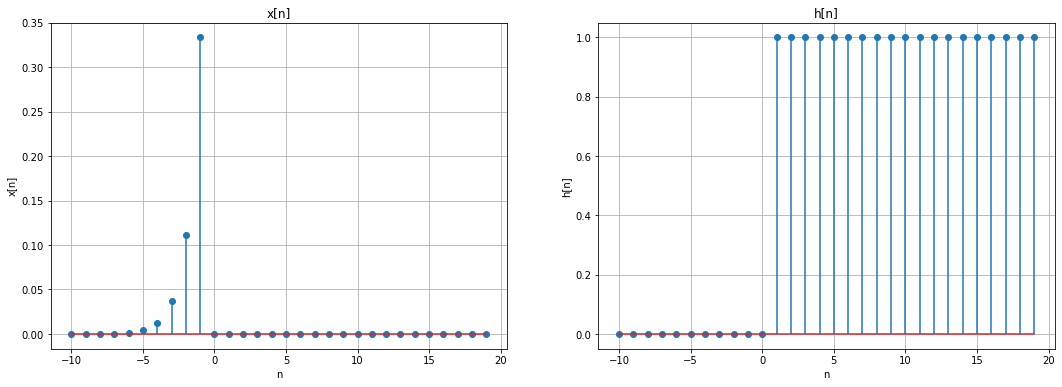

In [53]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.stem(disc_n,lti_x3)
plt.grid()
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('x[n]')
plt.subplot(122)
plt.stem(disc_n,lti_h3)
plt.grid()
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('h[n]')
plt.show()

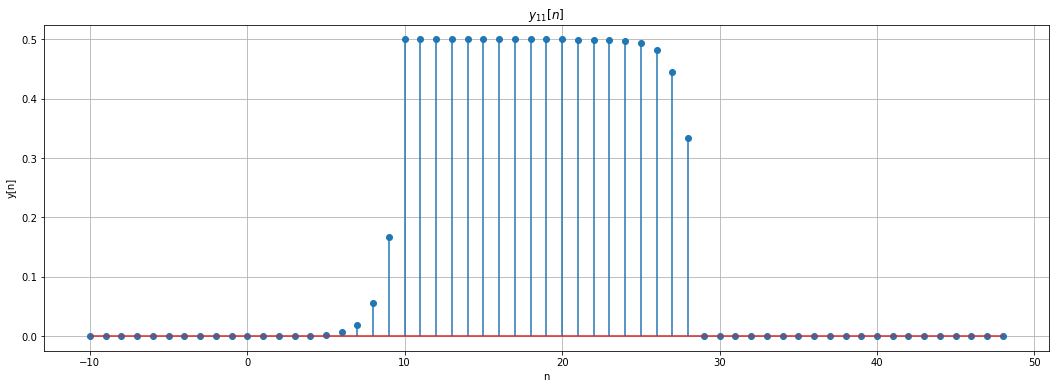

In [54]:
plt.figure(figsize=(18,6))
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('$y_{11}[n]$')
plt.stem(disc_n_x6[90:149],lti_y11)
plt.grid()
plt.show()

####  Consider the first-order difference equation: y[n]+2y[n−1] = x[n]. Assuming the condition of initial rest (i.e., if x[n] = 0 for n < n0, then y[n] = 0 for n < n0), find the impulse response of a system whose input and output are related by this difference equation

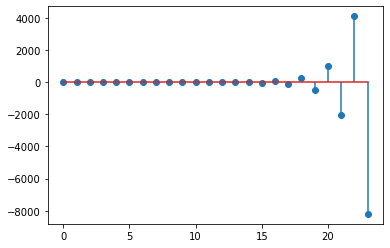

In [55]:
# By solving above difference equation, we get, h[n] = (-2)^n u[n] for n>=0

lti_diff =  np.power(-2.0,disc_n)*disc_basic_x1
plt.stem(lti_diff[0:24])

plt.show()

In [56]:
# Alternate method by solving index wise

lti_diff_y = np.zeros(len(disc_n))
for i,n in enumerate(disc_n):
    lti_diff_y[i+1] = disc_x1[i+1] - 2*lti_diff_y[i]
    if i==28:
        break

<StemContainer object of 3 artists>

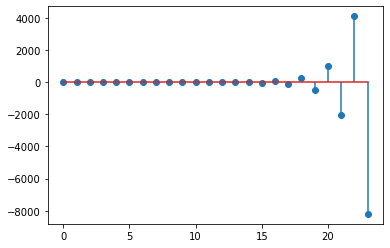

In [57]:
plt.stem(lti_diff_y[0:24])

#### Consider the evaluation of y[n] = x1[n] ∗ x2[n] ∗ x3[n], where
$$ x1 = (0.5)^{n}u[n] $$
$$ x2 = u[n + 3] $$
$$ x3 = δ[n] − δ[n − 1] $$
#### (i) Evaluate the convolution x1[n] ∗ x2[n].
#### (ii) Convolve the result of part (i) with x3[n] in order to evaluate y[n].
#### (iii) Evaluate the convolution x2[n] ∗ x3[n].
#### (iv) Convolve the result of part (iii) with x1[n] in order to evaluate y[n].
Plot the signals

In [58]:
lti_n1 = np.arange(-10,20)
lti_n2 = np.arange(-20,39)
lti_n3 = np.arange(-30,58)

In [59]:
lti_x4 = np.zeros(len(lti_n1))
lti_x5 = np.zeros(len(lti_n1))
lti_x6 = np.zeros(len(lti_n1))

for i,n in enumerate(lti_n1):
    if n>=-0:
        lti_x4[i] = np.power(0.5,n)
    else:
        lti_x4[i] = 0
    
    if n>=-3:
        lti_x5[i] = 1
    else:
        lti_x5[i] = 0
        
    if n==0:
        lti_x6[i] = 1
    elif n==1:
        lti_x6[i] = -1
    else:
        lti_x6[i] = 0

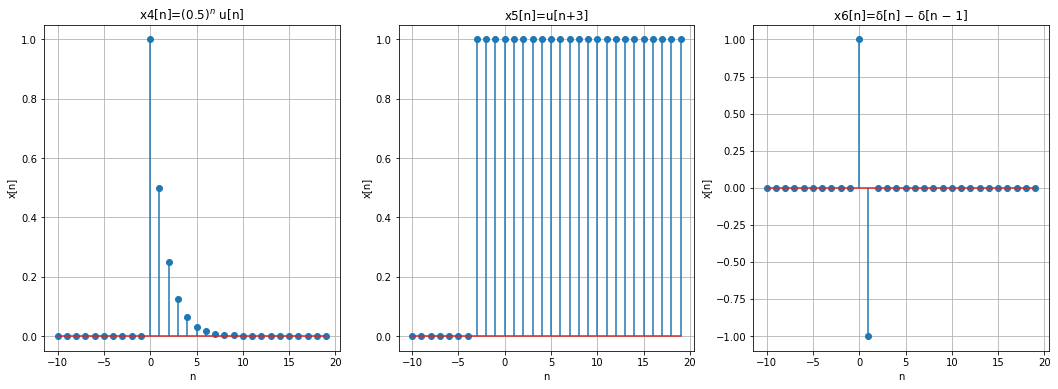

In [60]:
plt.figure(figsize=(18,6))
plt.subplot(131)
plt.stem(lti_n1,lti_x4)
plt.grid()
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('x4[n]=(0.5)$^{n}$ u[n]')
plt.subplot(132)
plt.stem(lti_n1,lti_x5)
plt.grid()
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('x5[n]=u[n+3]')
plt.subplot(133)
plt.stem(lti_n1,lti_x6)
plt.grid()
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('x6[n]=δ[n] − δ[n − 1]')
plt.show()

In [61]:
lti_y12 = lti_conv(lti_x4,lti_x5)
lti_y13 = lti_conv(lti_y12,lti_x6)

lti_y14 = lti_conv(lti_x5,lti_x6)
lti_y15 = lti_conv(lti_x4,lti_y14)

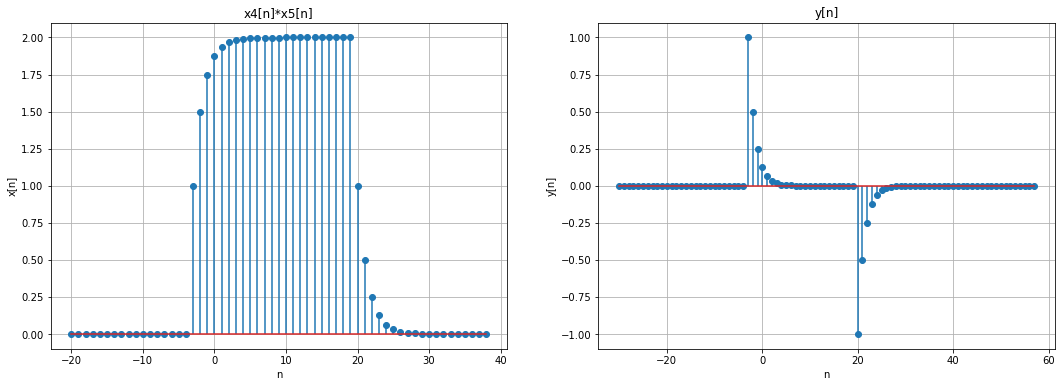

In [62]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.stem(lti_n2,lti_y12)
plt.grid()
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('x4[n]*x5[n]')
plt.subplot(122)
plt.stem(lti_n3,lti_y13)
plt.grid()
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('y[n]')
plt.show()

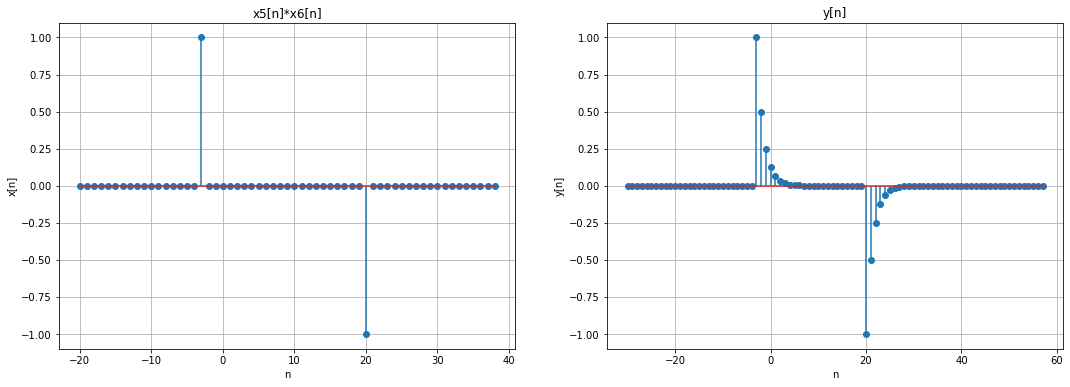

In [63]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.stem(lti_n2,lti_y14)
plt.grid()
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('x5[n]*x6[n]')
plt.subplot(122)
plt.stem(lti_n3,lti_y15)
plt.grid()
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('y[n]')
plt.show()